In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv("Accidents0515.csv");df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [99]:
df.Accident_Severity.nunique()

3

In [36]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [37]:
df.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [38]:
df.drop(["Accident_Index","LSOA_of_Accident_Location","Accident_Index",'Local_Authority_(Highway)',"Date"],axis=1,inplace=True)

In [39]:
df.dropna(inplace=True)

In [40]:
df.isna().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-

In [41]:
df.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
Junction_Control                                 int64
2nd_Road_Class                                   int64
2nd_Road_N

In [63]:
df= df[['Number_of_Vehicles', 'Day_of_Week',
       'Time', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area']]
df.head()


,Number_of_Vehicles,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,1,3,17,6,30,0,-1,1,2,2,0,0,1
1,1,4,17,3,30,6,2,4,1,1,0,0,1
2,2,5,0,6,30,0,-1,4,1,1,0,0,1
3,1,6,10,6,30,0,-1,1,1,1,0,0,1
4,1,2,21,6,30,0,-1,7,1,2,0,0,1


In [64]:
df["Time"]

0          17
1          17
2           0
3          10
4          21
5          12
6          20
7          17
8          22
9          16
10          0
11         20
12         12
13          5
14         11
15         10
16          0
17          9
18         21
19          3
20         21
21         17
22         21
23         17
24          7
25         16
26         20
27         13
28         18
29          7
           ..
1780623    17
1780624    19
1780625     1
1780626    19
1780627    14
1780628     8
1780629     6
1780630    11
1780631     4
1780632    15
1780633    13
1780634    15
1780635     6
1780636    14
1780637     9
1780638    14
1780639    22
1780640    20
1780641     9
1780642    19
1780643    16
1780644    20
1780645    17
1780646    16
1780647     2
1780648    13
1780649    13
1780650     0
1780651    12
1780652    16
Name: Time, Length: 1780364, dtype: int64

In [65]:
df.Time = df.Time.str[:2].astype(int)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [66]:
df.head()

,Number_of_Vehicles,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,1,3,17,6,30,0,-1,1,2,2,0,0,1
1,1,4,17,3,30,6,2,4,1,1,0,0,1
2,2,5,0,6,30,0,-1,4,1,1,0,0,1
3,1,6,10,6,30,0,-1,1,1,1,0,0,1
4,1,2,21,6,30,0,-1,7,1,2,0,0,1


In [67]:
df.Longitude=np.floor_divide(df.Longitude,0.0001)/10000
df.Latitude=np.floor_divide(df.Latitude,0.0001)/10000

AttributeError: 'DataFrame' object has no attribute 'Longitude'

In [68]:
df.head()

,Number_of_Vehicles,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
0,1,3,17,6,30,0,-1,1,2,2,0,0,1
1,1,4,17,3,30,6,2,4,1,1,0,0,1
2,2,5,0,6,30,0,-1,4,1,1,0,0,1
3,1,6,10,6,30,0,-1,1,1,1,0,0,1
4,1,2,21,6,30,0,-1,7,1,2,0,0,1


In [69]:
records=df.head(10000).values

In [72]:
records[0:5]

array([[ 1,  3, 17,  6, 30,  0, -1,  1,  2,  2,  0,  0,  1],
       [ 1,  4, 17,  3, 30,  6,  2,  4,  1,  1,  0,  0,  1],
       [ 2,  5,  0,  6, 30,  0, -1,  4,  1,  1,  0,  0,  1],
       [ 1,  6, 10,  6, 30,  0, -1,  1,  1,  1,  0,  0,  1],
       [ 1,  2, 21,  6, 30,  0, -1,  7,  1,  2,  0,  0,  1]])

In [50]:
records.astype(bool)

array([[ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True]])

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()

In [51]:
from mlxtend.cluster import Kmeans

In [93]:
km = Kmeans(k=2, max_iter=50,  random_seed=1, print_progress=3)
km.fit(X=records,init_params=True)

Iteration: 5/50 | Elapsed: 00:00:00 | ETA: 00:00:00

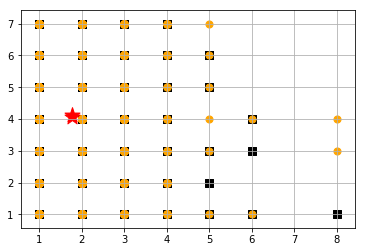

In [95]:
y_clust = km.predict(records)

plt.scatter(records[y_clust == 0, 0],
            records[y_clust == 0, 1],
            s=50,
            c='black',
            marker='s',
            label='cluster 1')

plt.scatter(records[y_clust == 1,0],
            records[y_clust == 1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

# plt.scatter(records[y_clust == 2,0],
#             records[y_clust == 2,1],
#             s=50,
#             c='lightblue',
#             marker='v',
#             label='cluster 3')

# plt.scatter(records[y_clust == 3,0],
#             records[y_clust == 3,1],
#             s=50,
#             c='black',
#             marker='v',
#             label='cluster 4')

# plt.scatter(records[y_clust == 4,0],
#             records[y_clust == 4,1],
#             s=50,
#             c='lightblue',
#             marker='v',
#             label='cluster 5')


plt.scatter(km.centroids_[:,0],
            km.centroids_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

# plt.legend(loc='lower left',
#            scatterpoints=1)
plt.grid()
plt.show()

In [96]:
y_clust

array([0, 0, 1, ..., 1, 1, 1])

In [87]:
records=records.astype(int)
records

array([[ 1,  3, 17, ...,  0,  0,  1],
       [ 1,  4, 17, ...,  0,  0,  1],
       [ 2,  5,  0, ...,  0,  0,  1],
       ...,
       [ 2,  3, 12, ...,  0,  0,  1],
       [ 2,  4, 11, ...,  0,  0,  1],
       [ 2,  5, 10, ...,  0,  0,  1]])

In [18]:
# te_ary = te.fit(records).transform(records)
# te_ary

In [19]:
te.columns_

AttributeError: 'TransactionEncoder' object has no attribute 'columns_'

In [ ]:
print(te.columns_)
df = pd.DataFrame(records, columns=te.columns_)
print (df)

In [80]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df.astype(bool), min_support=0.5, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

       support                                           itemsets  length
0     1.000000                               (Number_of_Vehicles)       1
1     1.000000                                      (Day_of_Week)       1
2     0.984737                                             (Time)       1
3     1.000000                                        (Road_Type)       1
4     0.999999                                      (Speed_limit)       1
5     0.597619                                  (Junction_Detail)       1
6     0.956799                                 (Junction_Control)       1
7     1.000000                                 (Light_Conditions)       1
8     1.000000                               (Weather_Conditions)       1
9     1.000000                          (Road_Surface_Conditions)       1
10    1.000000                              (Urban_or_Rural_Area)       1
11    1.000000                  (Number_of_Vehicles, Day_of_Week)       2
12    0.984737                        

In [84]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.01)
# print(list(rules))
rules1=rules[['antecedents','consequents','support','confidence','lift']]
print(rules1)


                                             antecedents  \
0                                     (Junction_Control)   
1                                      (Junction_Detail)   
2                  (Number_of_Vehicles, Junction_Detail)   
3                 (Number_of_Vehicles, Junction_Control)   
4                                      (Junction_Detail)   
5                                     (Junction_Control)   
6                        (Junction_Control, Day_of_Week)   
7                         (Junction_Detail, Day_of_Week)   
8                                     (Junction_Control)   
9                                      (Junction_Detail)   
10                               (Time, Junction_Detail)   
11                              (Time, Junction_Control)   
12                                     (Junction_Detail)   
13                                    (Junction_Control)   
14                         (Junction_Control, Road_Type)   
15                          (Junction_De